# Exploratory Data Analysis for 'kooprijs'

## Importing the dataset and libraries

In [46]:
# Importing libraries
import numpy as np
import pandas as pd
from datetime import date

# Visualisation
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# importing file and create a dataframe
df_original = pd.read_csv('housing_data.csv')
# Show first 5 rows
df_original.head()

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1971-1980,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,4388064,62,2018-11-12
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,2001-2010,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,4399344,70,2018-11-23
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,4400638,144,2018-12-14
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,4401765,323,2018-12-06


In [48]:
# Create a copy to work in
df = df_original.copy()

 Preparing the data for EDA

In [49]:
# Change the data types into date
df["publicatieDatum"] = pd.to_datetime(df["publicatieDatum"]).dt.date
df["datum_ondertekening"] = pd.to_datetime(df["datum_ondertekening"]).dt.date

Adding the 'Time to sell' column 
and removing the unusable columns and rows

In [50]:
# Add a new column
df['Time_to_sell'] = (df.datum_ondertekening - df.publicatieDatum)

# Drop columns without use for this project and columns that do not have data for all columns/variables
df = df.drop(['globalId', 'kantoor_naam_MD5hash', 'globalId.1', 'perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse' ], 1)

# Drop rows with empty values (at the purchasing price)
df = df.dropna()

# Show new data frame
df.head()

,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,aantalKamers,oppervlakte,datum_ondertekening,Time_to_sell
0,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1971-1980,1,3,62,2018-11-12,104 days
1,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980,1,5,136,2018-08-30,-25 days
2,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,2001-2010,0,3,70,2018-11-23,113 days
3,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973,1,5,144,2018-12-14,132 days
4,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900,0,8,323,2018-12-06,123 days


In [51]:
# Time_to_sell needs to be changed into int64
columns = ['Time_to_sell']
for col in columns:
    df[col] = df[col].astype('int64')
        
# Removing the instances where the selling date in before the posting date (this mistake is made on the Funda webpage)
df = df.drop(df[df.Time_to_sell < 0].index)

# Double check that it has worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207649 entries, 0 to 211616
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   publicatieDatum        207649 non-null  object 
 1   postcode               207649 non-null  object 
 2   koopPrijs              207649 non-null  float64
 3   volledigeOmschrijving  207649 non-null  object 
 4   soortWoning            207649 non-null  object 
 5   categorieObject        207649 non-null  object 
 6   bouwjaar               207649 non-null  object 
 7   indTuin                207649 non-null  int64  
 8   aantalKamers           207649 non-null  int64  
 9   oppervlakte            207649 non-null  int64  
 10  datum_ondertekening    207649 non-null  object 
 11  Time_to_sell           207649 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 20.6+ MB


In [52]:
# fixing soortwoning column

def clean_soortwoning(x):
    if "vrijstaande" in x: 
        return "vrijstaande_woning"
    if "appartement" in x:
        return "appartement"
    if "portiekflat" in x:
        return "portiekflat"
    if "eengezinswoning" in x:
        return "eengezinswoning"
    if "herenhuis" in x:
        return "herenhuis"
    if "bovenwoning" in x:
        return "bovenwoning"
    if "benedenwoning" in x:
        return "benedenwoning"
    else: 
        return "other"

df["soortWoning_cleaned"] = df["soortWoning"].apply(clean_soortwoning)

In [53]:
#getting only first 4 digits in postcode column 
#adding the postcode_index column

df['postcode']=df['postcode'].str[0:4]
postcode_df= df[["postcode"]]

postcode_df["postcode_index"]= [x for x in range(postcode_df.shape[0])]
df["postcode_prepared"] = postcode_df["postcode_index"]
postcode_df

<ipython-input-53-c369f055cc9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcode_df["postcode_index"]= [x for x in range(postcode_df.shape[0])]


,postcode,postcode_index
0,1774,0
2,1068,1
3,5628,2
4,7731,3
5,5971,4
...,...,...
211612,9791,207644
211613,6431,207645
211614,4051,207646
211615,4043,207647


In [54]:
#getting only first 4 digits in bouwjaar column 

df['bouwjaar']=df['bouwjaar'].str[0:4]

In [55]:
# Drop Vo and Na values from bouwjaar
df= df.drop(df[df.bouwjaar == '<{Vo'].index)
df= df.drop(df[df.bouwjaar == '<{Na'].index)

In [56]:
#Change bouwjaar type to int64

columns = ['bouwjaar']
for col in columns:
    df[col] = df[col].astype('int64')

In [57]:
# drop old columns, which are converted
df = df.drop(['publicatieDatum', 'postcode', 'volledigeOmschrijving', 'soortWoning', 'categorieObject', 'datum_ondertekening' ], 1)

In [58]:
df.head()

,koopPrijs,bouwjaar,indTuin,aantalKamers,oppervlakte,Time_to_sell,soortWoning_cleaned,postcode_prepared
0,139000.0,1971,1,3,62,8985600000000000,vrijstaande_woning,0
2,267500.0,2001,0,3,70,9763200000000000,appartement,1
3,349000.0,1973,1,5,144,11404800000000000,eengezinswoning,2
4,495000.0,1900,0,8,323,10627200000000000,vrijstaande_woning,3
5,162500.0,1970,1,4,68,20995200000000000,eengezinswoning,4


In [59]:
# It kept giving errors trying to save the df as a feather file, so it's saved as a csv-file
df.to_csv('prepared_df.csv')

Boxplot for Koopprijs

<AxesSubplot:>

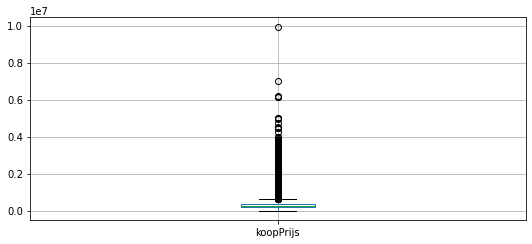

In [60]:
plt.figure()

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df.boxplot(['koopPrijs'])

Distribution graph of koopprijs



<function matplotlib.pyplot.show(close=None, block=None)>

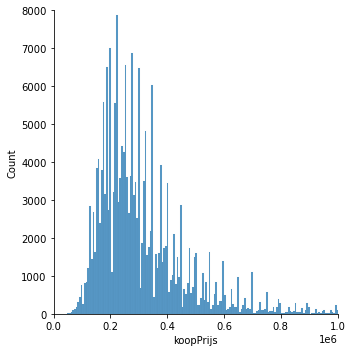

In [61]:




a_plot = sns.displot(df['koopPrijs'])
a_plot.set(xlim=(0.0, 1000000))
a_plot.set(ylim=(0, 8000))

plt.show

 Scatter plot for oppervlakte and koopPrijs

Text(0, 0.5, 'prijs')

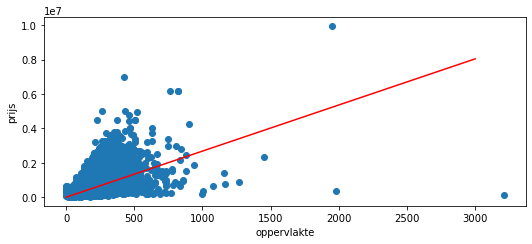

In [62]:

# Set columns to lists
opp = df.oppervlakte.to_list()
prijs = df.koopPrijs.to_list()       

# Calculating the mean 
average_opp = np.mean(df['oppervlakte'])
average_prijs = np.mean(df['koopPrijs'])

# Calculating B1 and B0
sum1 = 0
sum2 = 0
for i in range(len(opp)):
    sum1 = sum1 + ((opp[i] - average_opp)*(opp[i] - average_opp))
    sum2 = sum2 + ((prijs[i] - average_prijs)*(opp[i] - average_opp))
b1 = sum2/sum1
b0 = average_prijs - (b1 * average_opp)

# Plotting the linear regression line
x = np.linspace(0,3000,10)
y = b0 + (b1*x)
plt.plot(x,y,'r')
plt.scatter(opp, prijs)
plt.xlabel("oppervlakte")
plt.ylabel("prijs")

Heatmap

heatmap with correlations of dataframe
AxesSubplot(0.0398698,0.0879812;0.756104x0.891463)


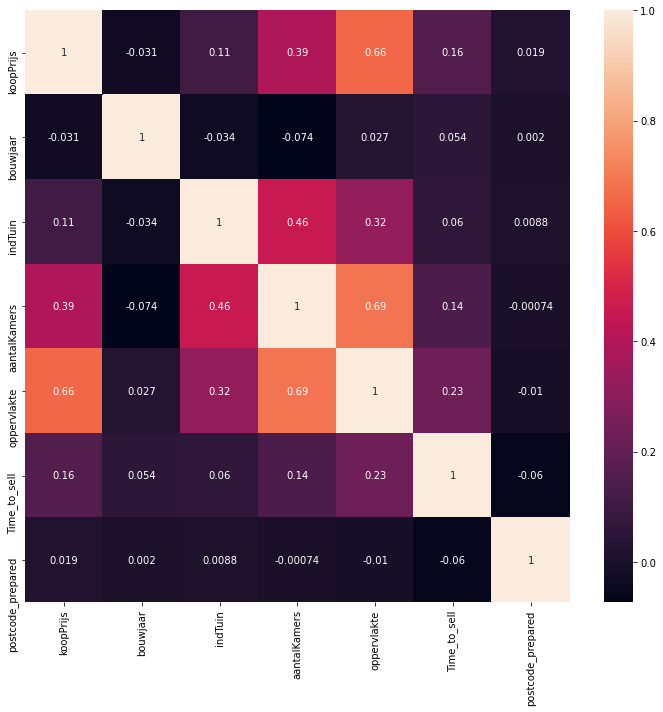

In [63]:
#Check dataset on correlations through a heatmap
plt.figure(figsize = (10, 10))       
print('heatmap with correlations of dataframe')
print(sns.heatmap(df.corr(),annot = True))